In [1]:
## libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
## import data
ds = pd.read_csv('./data/DataScientist.csv')
de = pd.read_csv('./data/DataEngineer.csv')
da = pd.read_csv('./data/DataAnalyst.csv')

#da = pd.read_csv('./data/DataAnalyst.csv', index_col = 0)

In [3]:
## drop 'Unnamed: 0' column
df_list = [ds, da, de]
for df in df_list:
    if 'Unnamed: 0' in df.columns:
        df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
ds = ds.replace(['-1', -1, ' ', 'NULL'],np.nan)

In [5]:
percent_missing = round(ds.isnull().sum() * 100 / len(ds),3)
missing_value_df = pd.DataFrame({'column_name': ds.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending= False, inplace=True)

missing_value_df = missing_value_df.reset_index()
missing_value_df.drop('index', axis = 1, inplace=True) #0 rows, 1 columns


In [7]:
print(missing_value_df)

          column_name  percent_missing
0          Easy Apply           95.805
1         Competitors           70.606
2             Founded           24.994
3            Industry           13.968
4              Sector           13.968
5              Rating           10.463
6        Headquarters            6.140
7                Size            5.858
8   Type of ownership            5.858
9             Revenue            5.858
10          Job Title            0.000
11    Salary Estimate            0.000
12    Job Description            0.000
13       Company Name            0.000
14           Location            0.000


In [6]:
## drop column at specific na%
print(missing_value_df[missing_value_df['percent_missing'] > 60])
ds = ds.dropna(thresh=ds.shape[0]*0.6, how = 'all', axis = 1)

   column_name  percent_missing
0   Easy Apply           95.805
1  Competitors           70.606


In [9]:
ds.describe()

,Rating,Founded
count,3500.000000,2932.000000
mean,3.784143,1972.371419
std,0.614619,52.719618
min,1.000000,1625.000000
25%,3.400000,1961.000000
50%,3.800000,1995.000000
75%,4.100000,2006.000000
max,5.000000,2020.000000


In [ ]:
# univariate analysis
## 1. char analysis

In [9]:
## job title
job_title_counts = ds['Job Title'].value_counts()

## lower case the column
ds['job_title'] = ds['Job Title'].str.lower()

In [14]:
## keep only jobs related to data science & machine learning
ds_jobs_list = ['data science', 'data scientist', 'machine learning', 'ml']

tmp = ds.job_title.str.contains("|".join(ds_jobs_list))

ds2 = ds.copy()
ds2.loc[~tmp, "job_title"] = np.nan

ds2 = ds2[ds2['job_title'].notna()]

#ds_2 = ds[ds.job_title.apply(lambda x: np.any(np.in1d(x, ds_jobs_list)))]

In [18]:
## job title
job_title_counts2 = ds2['job_title'].value_counts()
job_title_counts2 = pd.DataFrame({'job':job_title_counts2.index, 'count':job_title_counts2.values})

In [19]:
## transform sr. to senior, ml to machine learning, data science to data scientist
replace_values = {'sr' : 'senior', 'ml' : 'machine learning', 'data science' : 'data scientist', 'jr.': 'junior'}
ds2 = ds2.replace({'job_title': replace_values})

#ds2['job_title'] = ds2['job_itle'].str.replace('sr.', 'senior')

In [23]:
ds2['job_title_main'] = np.where(ds2.job_title.str.contains('manager'), 'manager/director',
np.where(ds2.job_title.str.contains('director'), 'manager/director',
np.where(ds2.job_title.str.contains('lead'), 'lead',
np.where(ds2.job_title.str.contains('senior'), 'senior/principal',
np.where(ds2.job_title.str.contains('principal'), 'senior/principal',
np.where(ds2.job_title.str.contains('junior'), 'junior',
np.where(ds2.job_title.str.contains('intern'), 'internship',
np.where(ds2.job_title.str.contains('machine learning'), 'machine learning', 'data scientist'))))))))

In [24]:
## job title main
job_title_counts3 = ds2['job_title_main'].value_counts()
job_title_counts3 = pd.DataFrame({'job':job_title_counts3.index, 'count':job_title_counts3.values})

In [26]:
## location
loc = ds2.Location.value_counts()
location_value_counts = pd.DataFrame({'location': loc.index, 'count': loc.values})

del loc

In [28]:
location_split = ds2['Location'].str.split(',', expand = True)
ds2['city'], ds2['state'] = location_split[0], location_split[1]

In [29]:
## industry
ind = ds2.Industry.value_counts()
industry_value_counts = pd.DataFrame({'industry': ind.index, 'count': ind.values})

del ind

In [37]:
sect = ds2.Sector.value_counts()
sector_value_counts = pd.DataFrame({'sector': sect.index, 'count': sect.values})

del sect

In [40]:

#sector_value_counts['sector'] = np.where(sector_value_counts['count'] <= 20, 'other', sector_value_counts['sector'])

## select sectors <= 20 obs
sector_few_vals = sector_value_counts[sector_value_counts['count'] <= 20]['sector']

## replace with 'Other'

ds2['sector_main'] = np.where(ds2.Sector.isin(sector_few_vals), 'Other', ds2['Sector'])

In [41]:
ds2.sector_main.value_counts()

Information Technology       524
Business Services            188
Other                         92
Finance                       77
Insurance                     54
Media                         40
Retail                        40
Health Care                   38
Biotech & Pharmaceuticals     32
Manufacturing                 24
Education                     22
Government                    21
Name: sector_main, dtype: int64

In [25]:
#char_df = ds2.select_dtypes(include = ['object'])

In [44]:
## numerical analysis - univariate

# compute company age
ds2['company_age'] = 2020 - ds2['Founded'] ## 2020 I believe it was the year when the data was retrieved

In [46]:
salary = ds2['Salary Estimate'].value_counts()

In [52]:
#to_replace = {"$": "", "K": "", "(Glassdoor est.)": ""}
ds2['salary_estimate'] = ds2['Salary Estimate'].str.replace("$", "").str.replace("K", "").str.replace("(Glassdoor est.)", "")
ds2['salary_estimate'] = ds2['salary_estimate'].str.replace("(", " ")
ds2['salary_estimate'] = ds2['salary_estimate'].str.replace(")", " ")

<ipython-input-52-a252bd8cb634>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ds2['salary_estimate'] = ds2['Salary Estimate'].str.replace("$", "").str.replace("K", "").str.replace("(Glassdoor est.)", "")
<ipython-input-52-a252bd8cb634>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ds2['salary_estimate'] = ds2['Salary Estimate'].str.replace("$", "").str.replace("K", "").str.replace("(Glassdoor est.)", "")


In [58]:
salary_split = ds2['salary_estimate'].str.split('-', expand = True)
ds2['min_salary'], ds2['max_salary'] = salary_split[0], salary_split[1]

In [63]:
## remove 3 rows with salary per hour
ds2 = ds2[~ds2.max_salary.str.contains('Hour')]

In [66]:
ds2.dtypes

index                float64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded              float64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
job_title             object
job_title_main        object
city                  object
state                 object
sector_main           object
company_age          float64
salary_estimate       object
min_salary            object
max_salary            object
dtype: object

In [68]:
ds2['max_salary'] = ds2['max_salary'].str.replace("Employer est. ", "")

<ipython-input-68-6d5b83634281>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ds2['max_salary'] = ds2['max_salary'].str.replace("Employer est. ", "")


In [70]:
ds2.min_salary = ds2.min_salary.astype(int)
ds2.max_salary = ds2.max_salary.astype(int)

In [71]:
print(ds2.min_salary.min()) #10
print(ds2.max_salary.max()) #98

12
254


In [73]:
ds2['salary_range'] = ds2.max_salary - ds2.min_salary

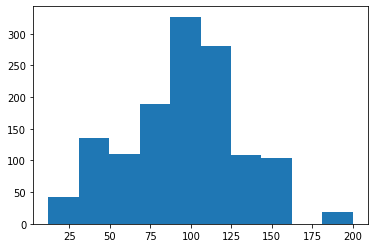

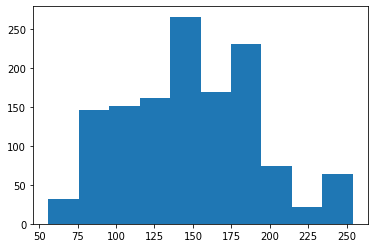

In [75]:
plt.hist(ds2.min_salary, bins= 10)
plt.show()

plt.hist(ds2.max_salary, bins= 10)
plt.show()

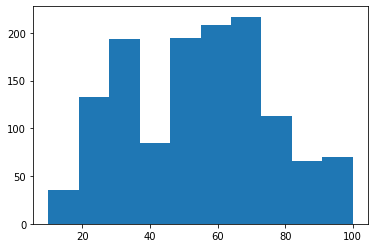

In [76]:
plt.hist(ds2.salary_range, bins= 10)
plt.show()

In [ ]:
## < 100, >=100, <150, >=150, <200, >=200